<a href="https://colab.research.google.com/github/savio-sandesh/Machine_Learning/blob/main/German_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# logistic
# svm
# random forest
# decision tree

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
df=pd.read_csv("/content/german_credit_data.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [22]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [23]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [24]:
df['Sex'].unique()
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [25]:
df['Housing'].unique()
df['Housing']=df['Housing'].map({'own':0,'rent':1,'free':2})

In [26]:
df['Saving accounts'].unique()
df['Saving accounts']=df['Saving accounts'].map({'little':0,'moderate':1,'rich':2,'quite rich':3})

In [27]:
df['Checking account'].unique()
df['Checking account']=df['Checking account'].map({'little':0,'moderate':1,'rich':2,'quite rich':3})

In [28]:
df['Purpose'].unique()
df['Purpose']=df['Purpose'].map({'car':0,'radio/TV':1,'furniture/equipment':2,'business':3,'education':4,'repairs':5,'vacation/others':6,'domestic appliances':7})

In [29]:
# Displaying the last 5 rows of the DataFrame
df.describe()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,817.000000,606.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,0.310000,1.904000,0.395000,0.474908,0.651815,3271.258000,20.903000,1.435000
std,288.819436,11.375469,0.462725,0.653614,0.674856,0.911350,0.659994,2822.736876,12.058814,1.527779
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000
25%,249.750000,27.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1365.500000,12.000000,0.000000
50%,499.500000,33.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2319.500000,18.000000,1.000000
75%,749.250000,42.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3972.250000,24.000000,2.000000
max,999.000000,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000


In [30]:
# Computing the correlation matrix
df.corr()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Unnamed: 0,1.000000,-0.010096,0.001693,-0.027345,0.003305,-0.030027,-0.059983,0.013488,0.030788,-0.055013
Age,-0.010096,1.000000,-0.161694,0.015673,0.112051,0.037279,0.008451,0.032716,-0.036136,-0.010915
Sex,0.001693,-0.161694,1.000000,-0.070298,0.033818,-0.017152,-0.002425,-0.093482,-0.081432,0.037027
Job,-0.027345,0.015673,-0.070298,1.000000,0.101939,-0.037338,-0.022126,0.285385,0.210910,-0.028309
Housing,0.003305,0.112051,0.033818,0.101939,1.000000,-0.023131,-0.084878,0.171585,0.137434,-0.018277
Saving accounts,-0.030027,0.037279,-0.017152,-0.037338,-0.023131,1.000000,0.155945,-0.065134,-0.029050,-0.012430
Checking account,-0.059983,0.008451,-0.002425,-0.022126,-0.084878,0.155945,1.000000,-0.019838,-0.042768,0.021362
Credit amount,0.013488,0.032716,-0.093482,0.285385,0.171585,-0.065134,-0.019838,1.000000,0.624984,0.004413
Duration,0.030788,-0.036136,-0.081432,0.210910,0.137434,-0.029050,-0.042768,0.624984,1.000000,0.050324
Purpose,-0.055013,-0.010915,0.037027,-0.028309,-0.018277,-0.012430,0.021362,0.004413,0.050324,1.000000


In [31]:
# Checking for missing values in the DataFrame
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [32]:
# Imputation with Mean/Median/Mode:
df['Saving accounts'].fillna(df['Saving accounts'].mean(), inplace=True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)


<ipython-input-32-9c95067ac048>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Saving accounts'].fillna(df['Saving accounts'].mean(), inplace=True)
<ipython-input-32-9c95067ac048>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [33]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,0
Checking account,0
Credit amount,0
Duration,0
Purpose,0


<Axes: >

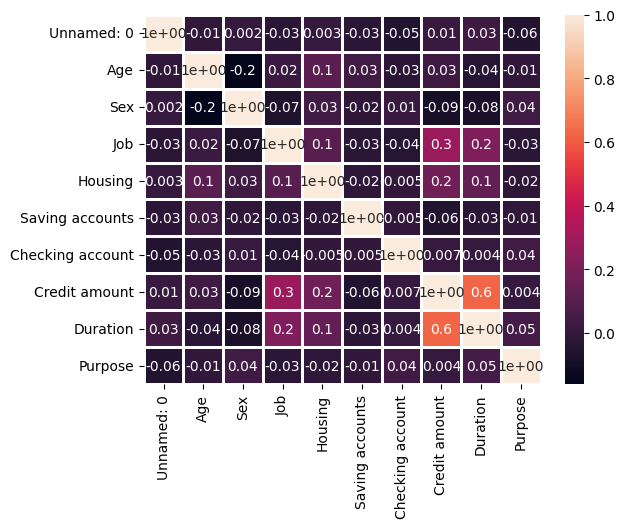

In [34]:
sns.heatmap(df.corr(),annot=True,linewidth=2,fmt='0.1')

<Axes: >

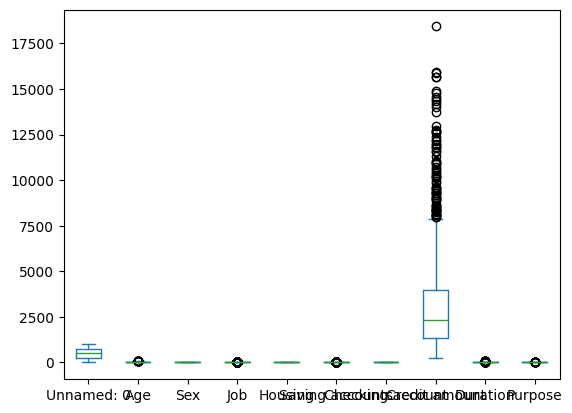

In [35]:
df.plot(kind='box')

In [36]:
y=df["Purpose"]
df.drop("Purpose",axis=1,inplace=True)
x=df

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
x_test.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration'],
      dtype='object')

In [39]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,precision_score

In [41]:
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.4
